In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
% cd /content/gdrive/My Drive/Github/"CS 499 - SPRING 2022"
! pwd

Mounted at /content/gdrive
/content/gdrive/My Drive/Github/CS 499 - SPRING 2022
/content/gdrive/My Drive/Github/CS 499 - SPRING 2022


In [2]:
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np
criterionMSE = torch.nn.MSELoss() # mean squared error loss
criterionMAE = torch.nn.L1Loss() # Mean absolute error loss


In [3]:
# Load in archived_output pickle
archived_output_COVID_Forecaster_50_epochs = None
archived_output_COVID_Forecaster_1000_epochs = None
archived_output_STAN_50_epochs = None
archived_output_STAN_1000_epochs = None
loc_list = None

COVID_Forecaster_50_epochs_path = '3. Experiments/3. COVID_Forecaster/saved_models/v3_1_archived_output_50_epochs_timed.pickle'
COVID_Forecaster_1000_epochs_path = '3. Experiments/3. COVID_Forecaster/saved_models/v3_2_archived_output_1000_epochs_timed.pickle'
# STAN_50_epochs_path = '1. STAN - Baseline Experiment/save/old_data/50_epochs_timed/archived_output_50_epochs.pickle'
STAN_1000_epochs_path = '3. Experiments/1. STAN-Original/Experiment1-1000Epochs/save/old_data/1000_epochs_timed/archived_output_1000_epochs.pickle'

with open(COVID_Forecaster_50_epochs_path, 'rb') as handle:
    archived_output_COVID_Forecaster_50_epochs = pickle.load(handle)
with open(COVID_Forecaster_1000_epochs_path, 'rb') as handle:
    archived_output_COVID_Forecaster_1000_epochs = pickle.load(handle)
# with open(STAN_50_epochs_path, 'rb') as handle:
#     archived_output_STAN_50_epochs = pickle.load(handle)
with open(STAN_1000_epochs_path, 'rb') as handle:
    archived_output_STAN_1000_epochs = pickle.load(handle)

loc_list = archived_output_STAN_1000_epochs['loc_list']

RuntimeError: ignored

In [ ]:
COVID_Forecaster_ground_truth_50_epochs = archived_output_COVID_Forecaster_50_epochs['ground_truth_number_infected_tensor']
COVID_Forecaster_ground_truth_1000_epochs = archived_output_COVID_Forecaster_1000_epochs['ground_truth_number_infected_tensor']
STAN_ground_truth_50_epochs = archived_output_STAN_50_epochs['ground_truth_number_infected_tensor']
STAN_ground_truth_1000_epochs = archived_output_STAN_1000_epochs['ground_truth_number_infected_tensor']

# Confirm/check that everything has the same ground truth
assert(torch.equal(COVID_Forecaster_ground_truth_50_epochs, STAN_ground_truth_50_epochs))
assert(torch.equal(COVID_Forecaster_ground_truth_1000_epochs, STAN_ground_truth_1000_epochs))
assert(torch.equal(COVID_Forecaster_ground_truth_50_epochs, COVID_Forecaster_ground_truth_1000_epochs))
groundTruth = COVID_Forecaster_ground_truth_50_epochs

COVID_Forecaster_predictions_50_epochs = archived_output_COVID_Forecaster_50_epochs['model_predictions_number_infected_tensor']
COVID_Forecaster_predictions_1000_epochs = archived_output_COVID_Forecaster_1000_epochs['model_predictions_number_infected_tensor']
STAN_predictions_50_epochs = archived_output_STAN_50_epochs['model_predictions_number_infected_tensor'].reshape((52, 15))
STAN_predictions_1000_epochs = archived_output_STAN_1000_epochs['model_predictions_number_infected_tensor'].reshape((52, 15))

In [ ]:
print(criterion(COVID_Forecaster_predictions_50_epochs, groundTruth).cpu().detach().item())
MSE_error_COVID_Forecaster_50epochs = criterion(COVID_Forecaster_predictions_50_epochs, groundTruth).cpu().detach().item()
# 344827968.0 Sunday MSE 
# 410671584.0 Monday MSE 
# 434005696.0 Tuesday MSE 
# Average MSE = 396,501,749.3333333
# 11659.193359375 Tuesday MAE

print(criterion(COVID_Forecaster_predictions_1000_epochs, groundTruth).cpu().detach().item())
MSE_error_COVID_Forecaster_1000epochs = criterion(COVID_Forecaster_predictions_1000_epochs, groundTruth).cpu().detach().item()
# 261207632.0 Sunday MSE 
# 268715552.0 Monday MSE 
# 273689056.0 Tuesday MSE 
# Average MSE = 267,870,746.6666667
# 7398.14208984375 Tuesday MAE

print(criterion(STAN_predictions_50_epochs, groundTruth).cpu().detach().item())
MSE_error_STAN_50epochs = criterion(STAN_predictions_50_epochs, groundTruth).cpu().detach().item()
# 362088448.0 Sunday MSE 
# 310936608.0 Monday MSE 
# 432272256.0 Tuesday MSE 
# Average MSE = 368,432,437.3333333
# 9558.0517578125 Tuesday MAE

print(criterion(STAN_predictions_1000_epochs, groundTruth).cpu().detach().item())
MSE_error_STAN_1000epochs = criterion(STAN_predictions_1000_epochs, groundTruth).cpu().detach().item()
# 706139456.0 Monday MSE 
# 11150.283203125 Tuesday MAE

11659.193359375
7398.14208984375
9558.0517578125
11150.283203125


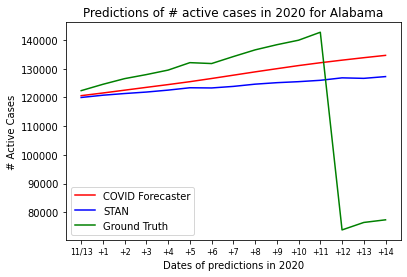

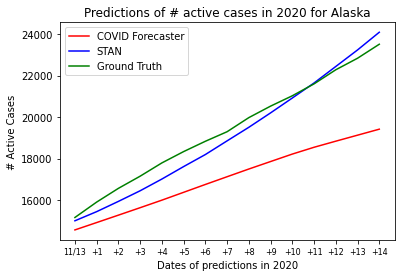

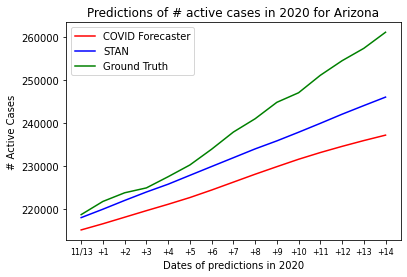

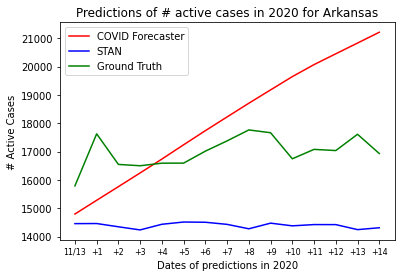

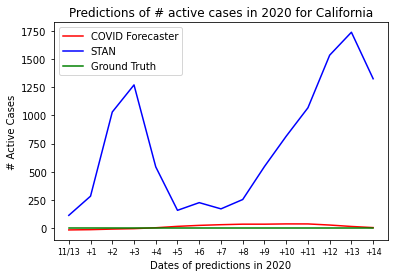

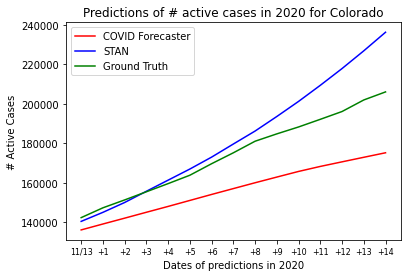

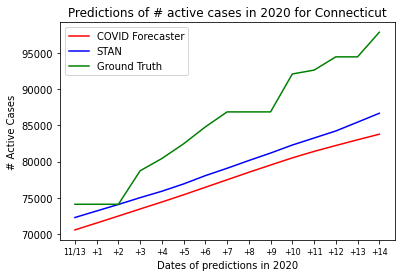

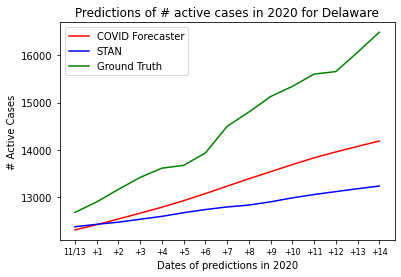

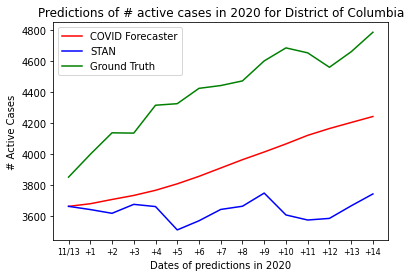

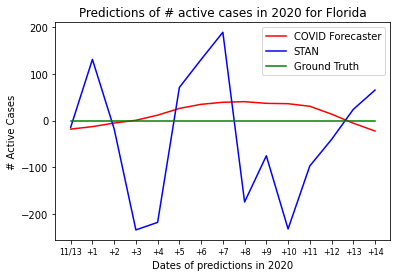

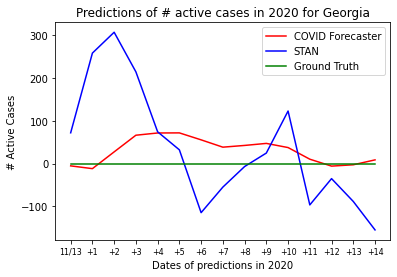

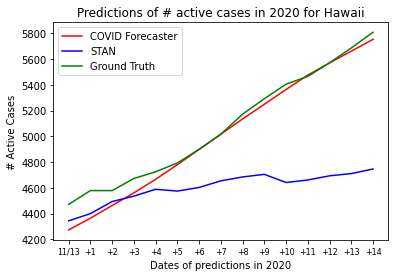

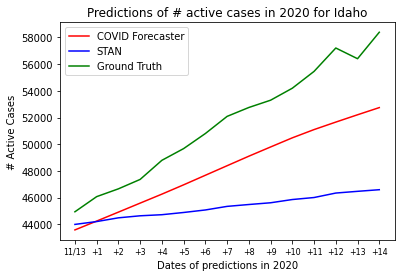

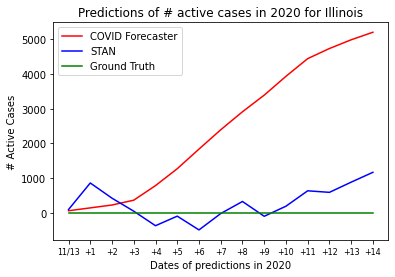

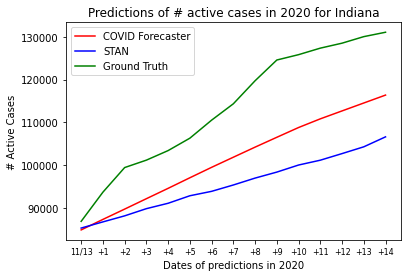

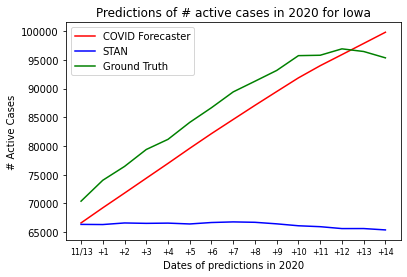

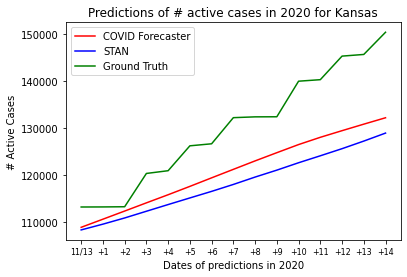

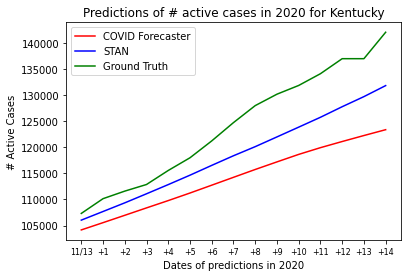

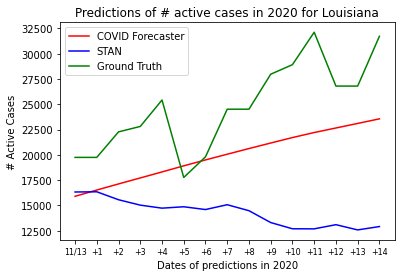

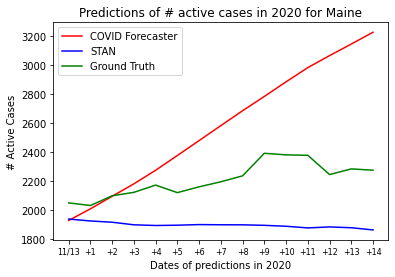

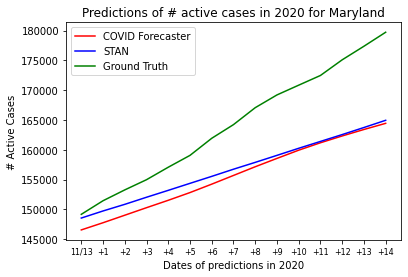

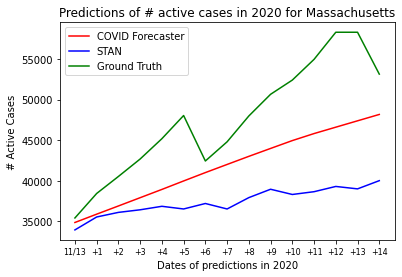

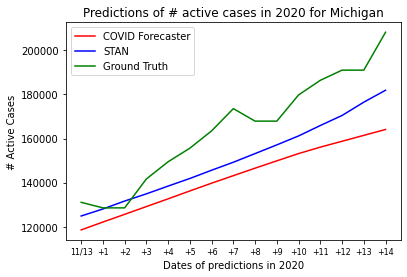

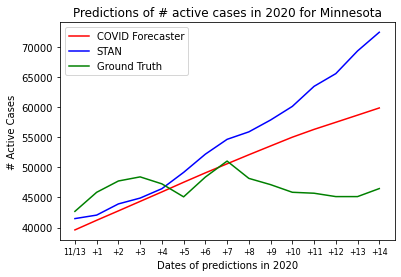

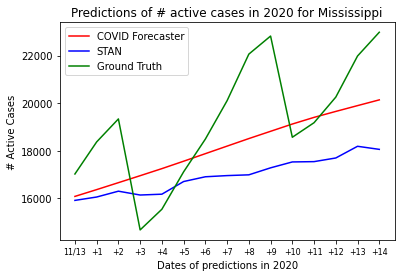

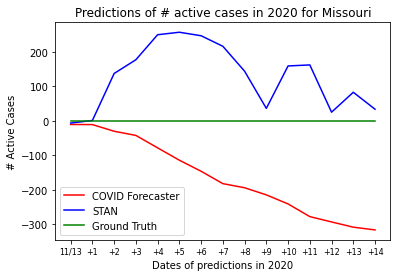

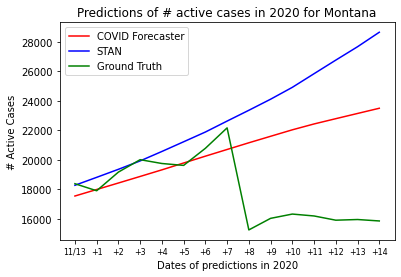

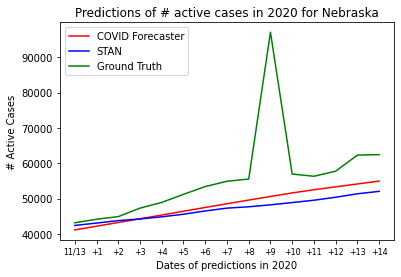

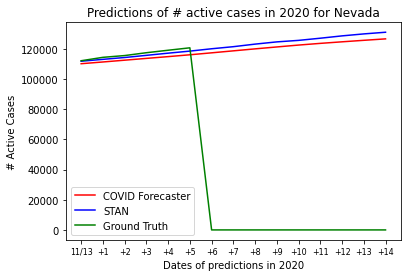

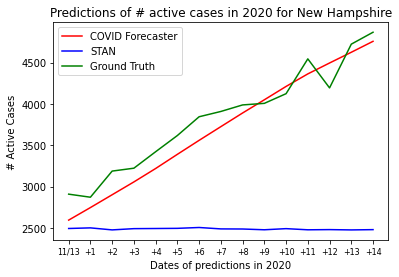

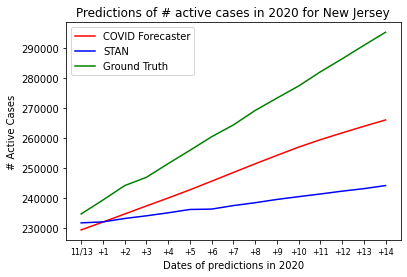

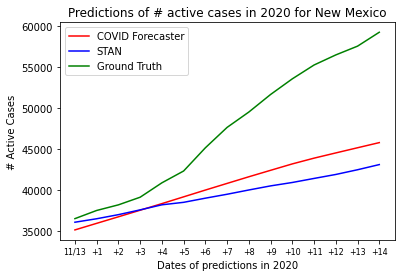

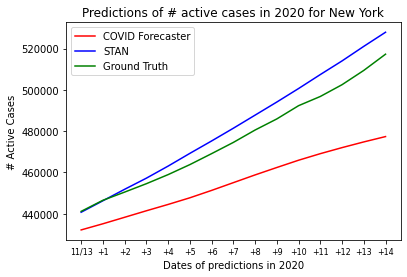

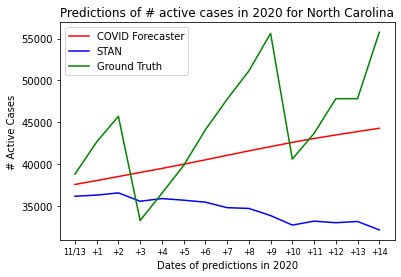

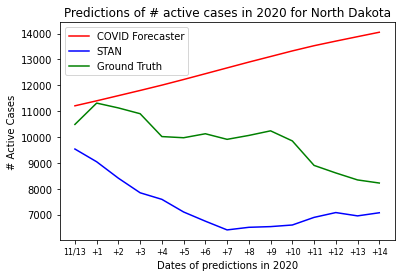

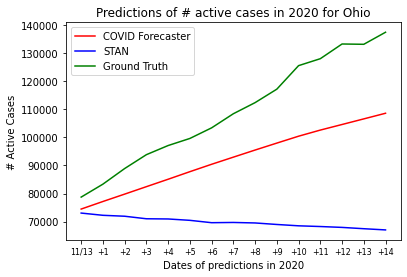

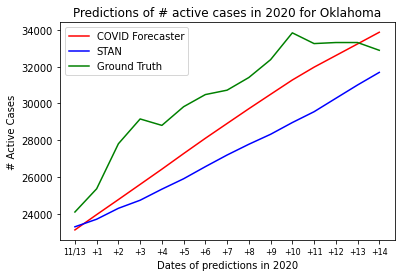

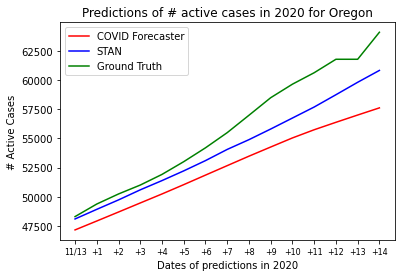

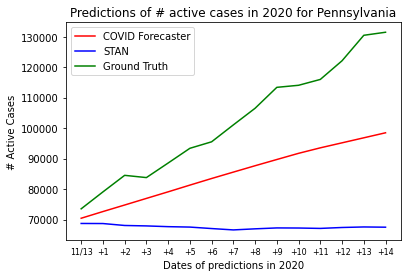

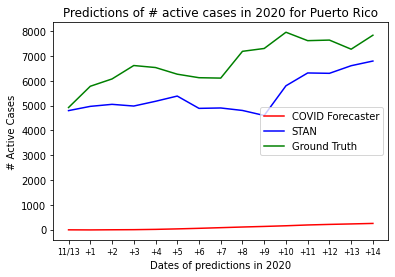

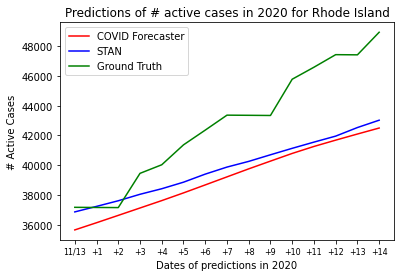

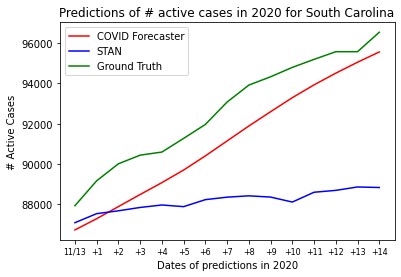

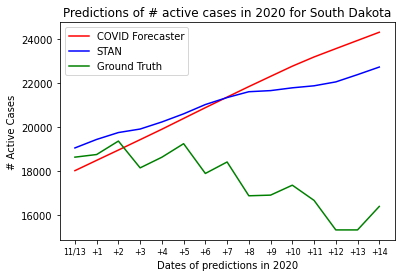

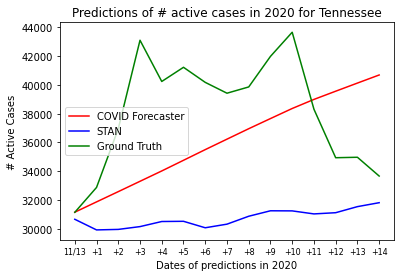

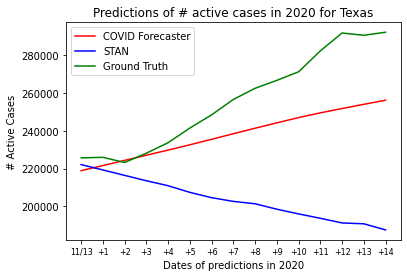

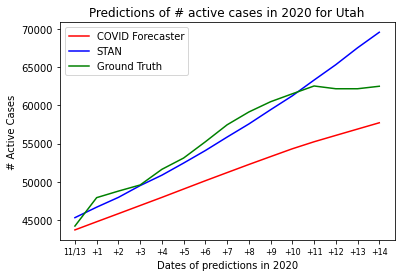

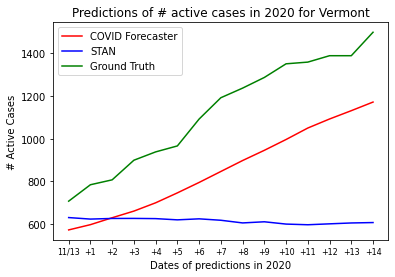

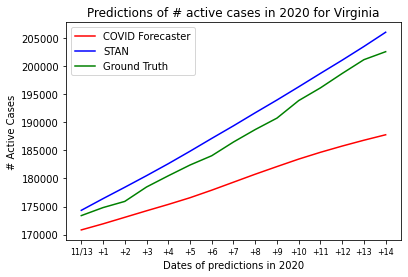

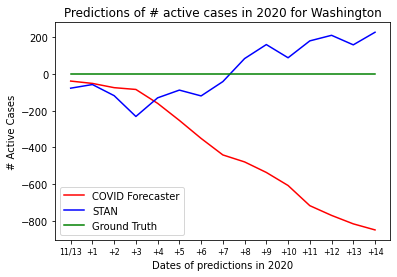

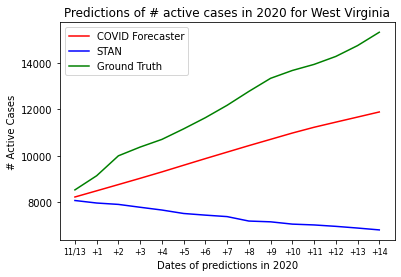

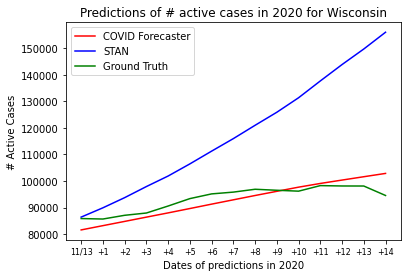

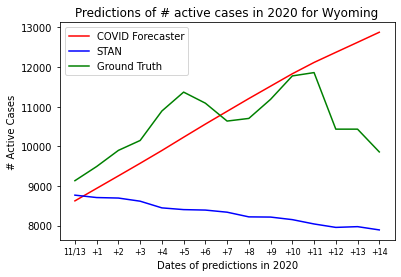

In [ ]:
# state_num = 8 # <-- good example
# state_num = 9 # <-- another good example
# state_num = 10 # <-- not so good example
# state_num = 11 # <-- very good example
# state_num = 12 # <-- another good example

# dateLabels = ['11/13', '11/14', '11/15', '11/16', '11/17', 
#               '11/18', '11/19', '11/20', '11/21', '11/22', 
#               '11/23', '11/24', '11/25', '11/26', '11/27']
dateLabels = ['11/13', '+1', '+2', '+3', '+4', 
              '+5', '+6', '+7', '+8', '+9', 
              '+10', '+11', '+12', '+13', '+14']

for state_num in range(len(loc_list)):
  plt.plot(COVID_Forecaster_predictions_1000_epochs[state_num].cpu().detach().numpy(),c='r', label='COVID Forecaster')
  plt.plot(STAN_predictions_50_epochs[state_num].cpu().detach().numpy(),c='b', label='STAN')
  plt.plot(groundTruth[state_num].cpu().detach().numpy(), c='g', label='Ground Truth')
  plt.ylabel("# Active Cases")
  plt.xlabel("Dates of predictions in 2020")
  plt.xticks(np.arange(0, 15), dateLabels, fontsize=8)
  plt.title("Predictions of # active cases in 2020 for " + loc_list[state_num])
  plt.legend()
  plt.savefig("4. Experiment Comparison Figures/old_data/2.1. Relabeled dates/" + loc_list[state_num], bbox_inches='tight')
  plt.show()

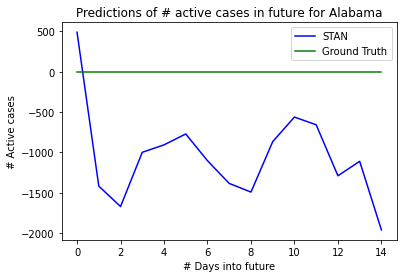

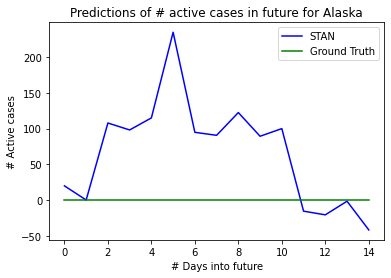

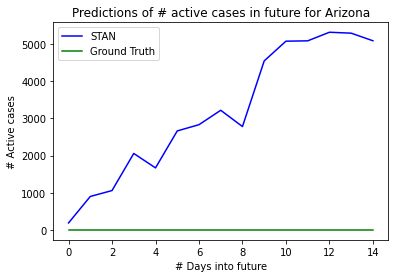

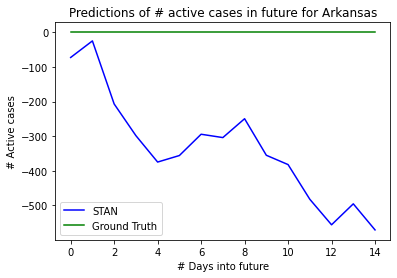

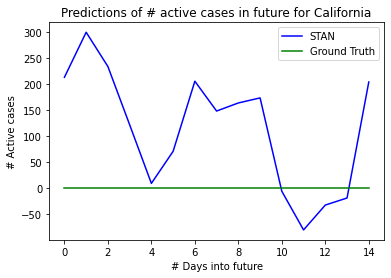

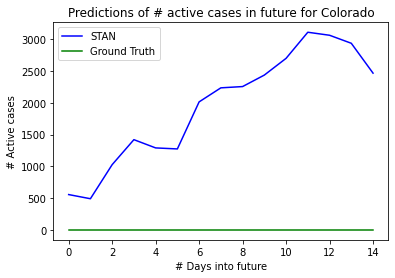

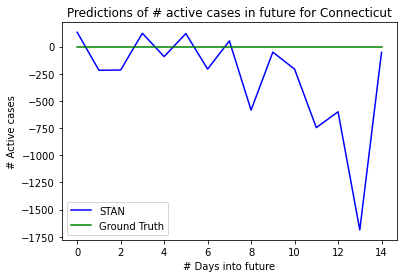

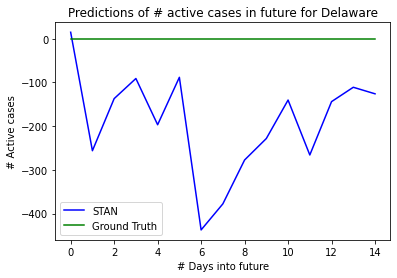

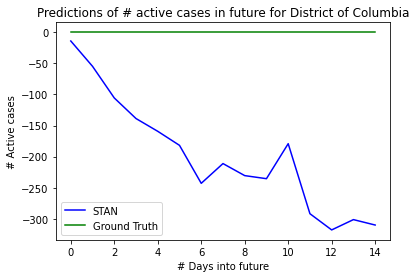

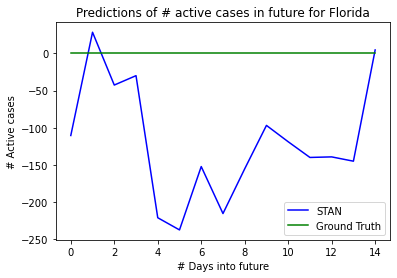

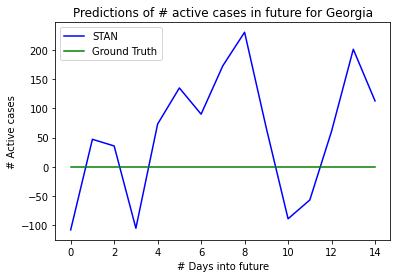

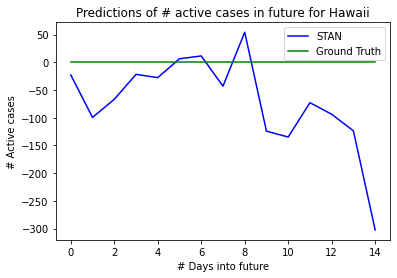

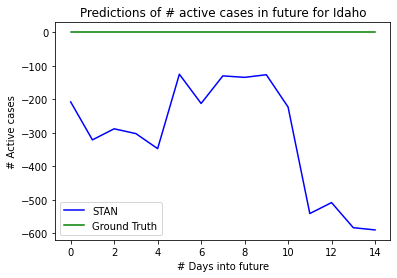

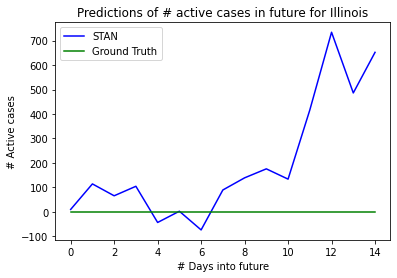

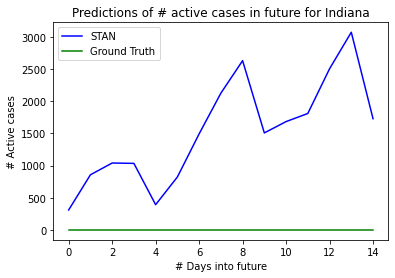

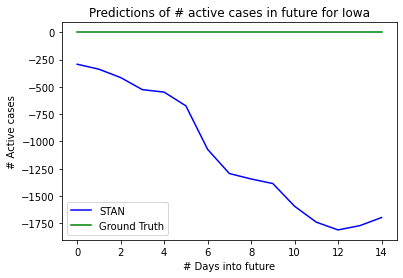

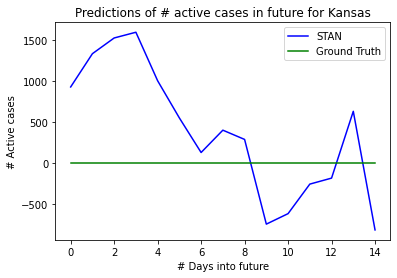

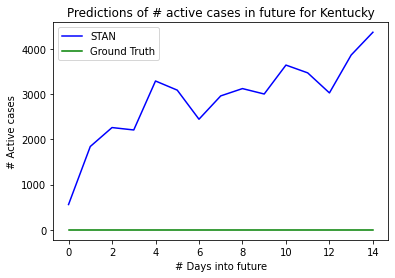

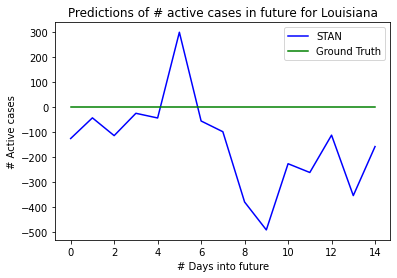

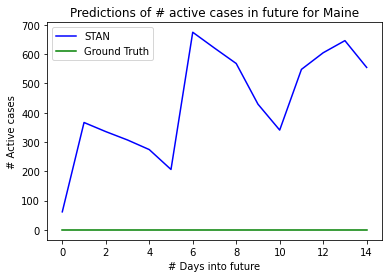

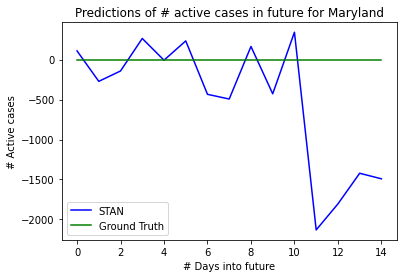

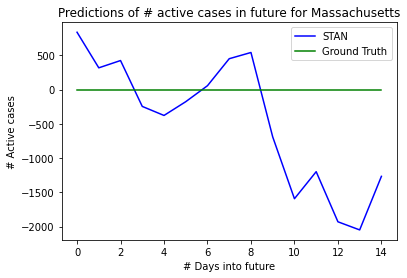

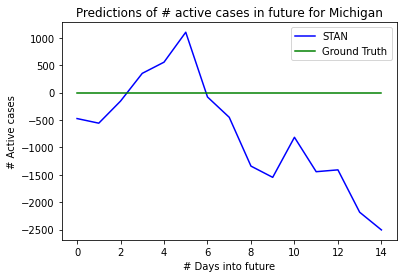

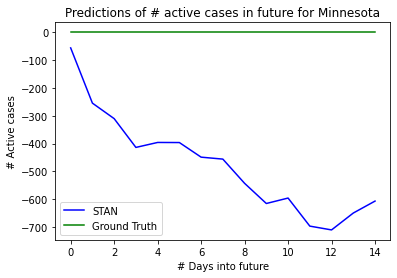

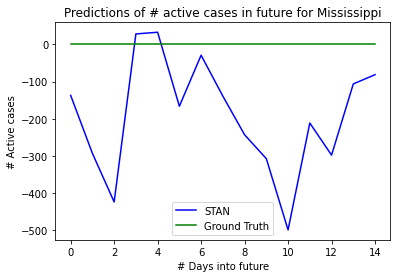

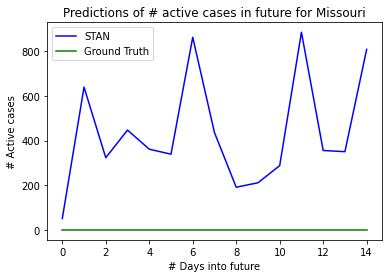

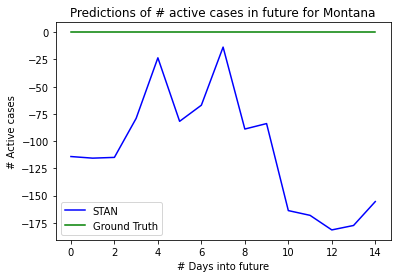

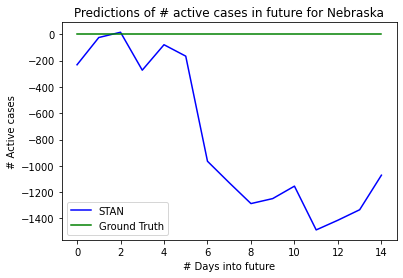

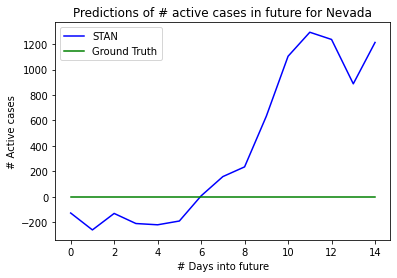

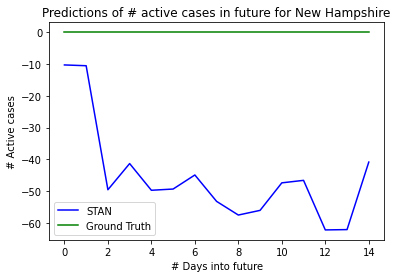

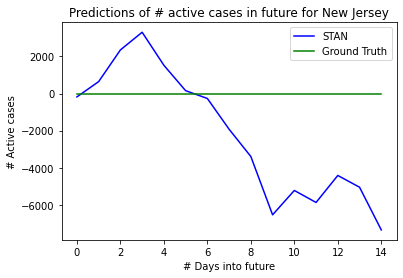

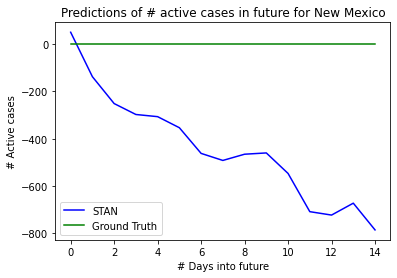

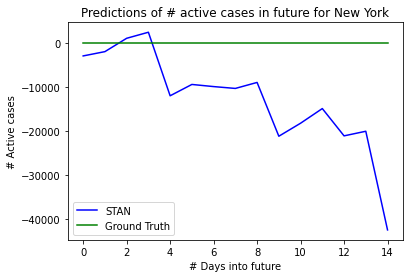

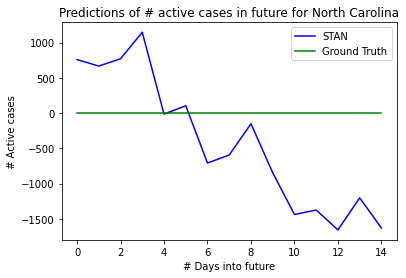

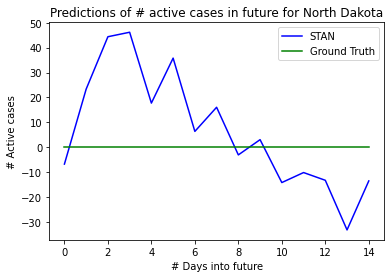

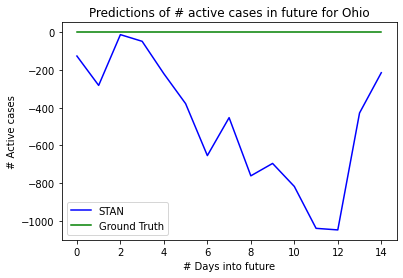

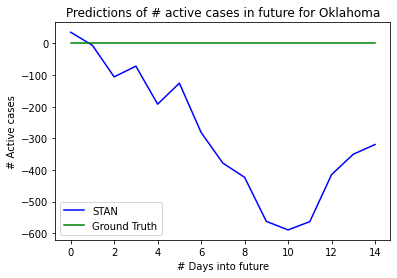

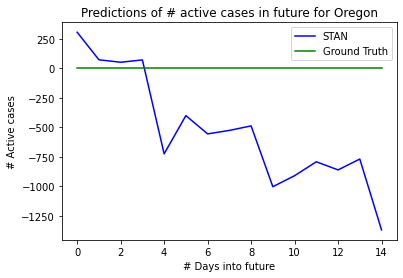

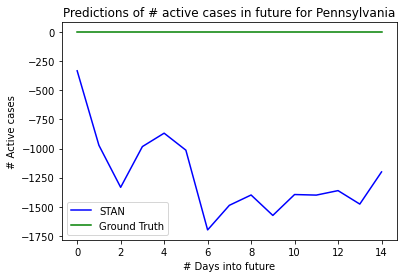

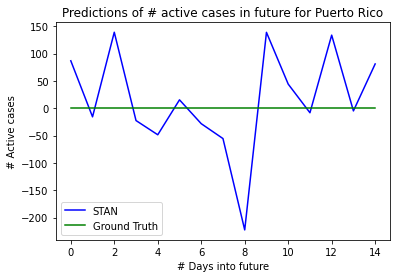

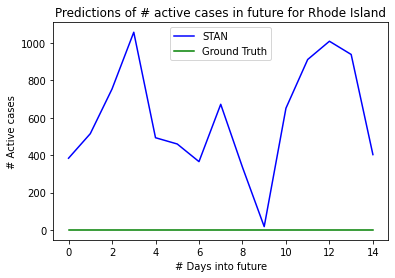

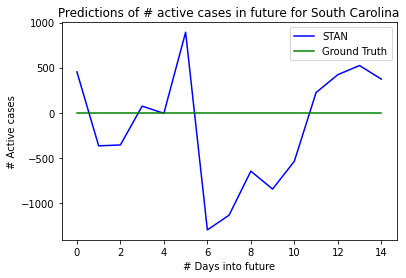

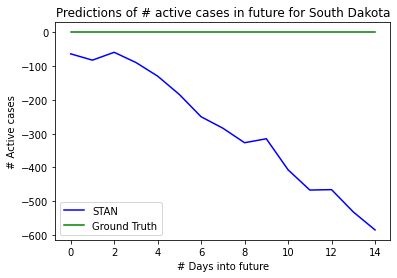

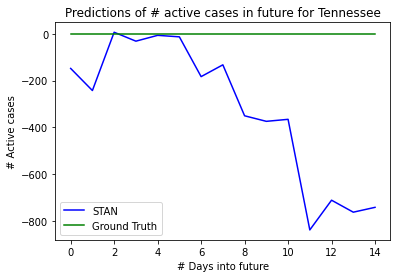

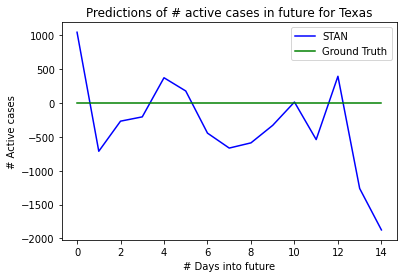

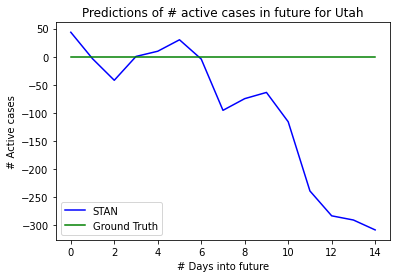

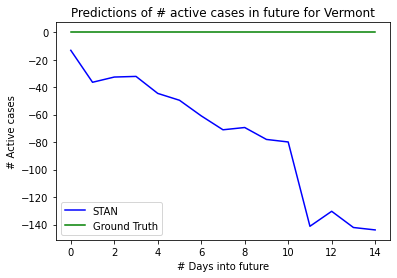

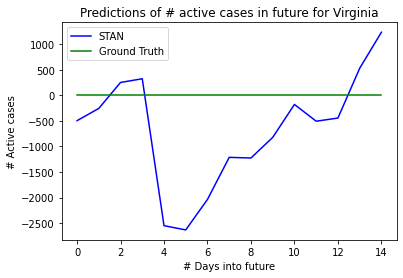

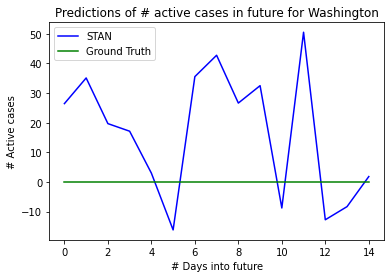

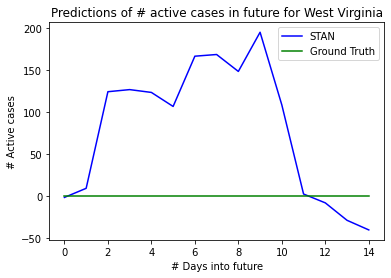

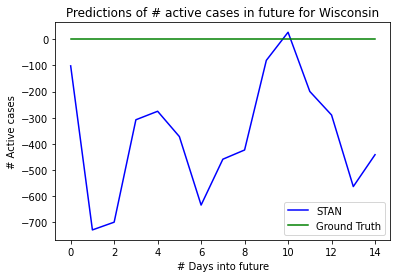

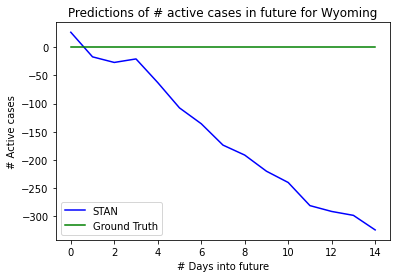

In [ ]:
# Plot stan's predictions for # active cases when trained on recent data

archived_output_STAN_new_data = None
STAN_new_data_path = '1. STAN - Baseline Experiment/save/new_data/50_epochs/archived_output.pickle'
with open(STAN_new_data_path, 'rb') as handle:
  archived_output_STAN_new_data = pickle.load(handle)
loc_list = archived_output_STAN_new_data['loc_list']
STAN_new_data_predictions = archived_output_STAN_new_data['model_predictions_number_infected_tensor'].reshape((52, 15))
groundTruth = archived_output_STAN_new_data['ground_truth_number_infected_tensor'].reshape((52, 15))

for state_num in range(len(loc_list)):
  plt.plot(STAN_new_data_predictions[state_num].cpu().detach().numpy(),c='b', label='STAN')
  plt.plot(groundTruth[state_num].cpu().detach().numpy(), c='g', label='Ground Truth')
  plt.ylabel("# Active cases")
  plt.xlabel("# Days into future")
  plt.title("Predictions of # active cases in future for " + loc_list[state_num])
  plt.legend()
  plt.savefig("4. Experiment Comparison Figures/new_data/STAN/" + loc_list[state_num], bbox_inches='tight')
  plt.show()

